#  Trabalho prático 2  

O trabalho prático que se segue, destina-se à previsão se uma feature consoante os outros dados presente no csv. 

Numa primeira instância são importadas as librarias. 

!!!! Work load Average/day está na forma de string portanto não pode ser lido de nomento -> passar para float com algum comando que leia a coluna e passe de string para float no csv !!!!

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import csv
%matplotlib inline

De seguida, é necessário importar os dados de teste de modo a avaliar o modelo numa primeira instância.

In [56]:
train=pd.read_csv("train_data.csv",converters={"Work load Average/day":int})

## Visualização dos dados

In [57]:
train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,1
3,4,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
ID                                 500 non-null int64
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null object
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                           

In [59]:
train.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,144.481833,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,1.000000,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,125.750000,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,250.500000,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,375.250000,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,500.000000,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


## Análise dos dados 

Vamos criar alguns plots de modo a visualizar e explorar os dados, e a correlação entre alguns dados.

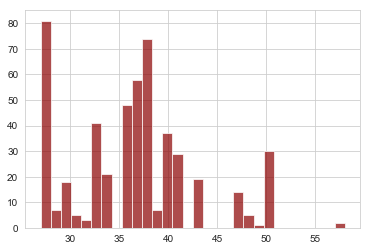

In [60]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

Pelo gráfico anterior, como é possível observar, os empregados da empresa possuem uma maior distribuição de empregados abixo do 30, sendo que entre os 35 e 40 anos também existe uma grande densidade de empregados.

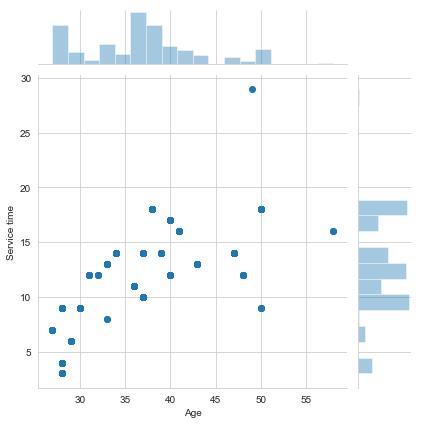

In [61]:
sns.jointplot(x='Age',y='Service time',data=train)

Por exemplo, através do pair plot anterior, é possível observar que funcionários de uma idade maior, trabalham em média mais horas que funcionários com uma idade inferior na empresa.

C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


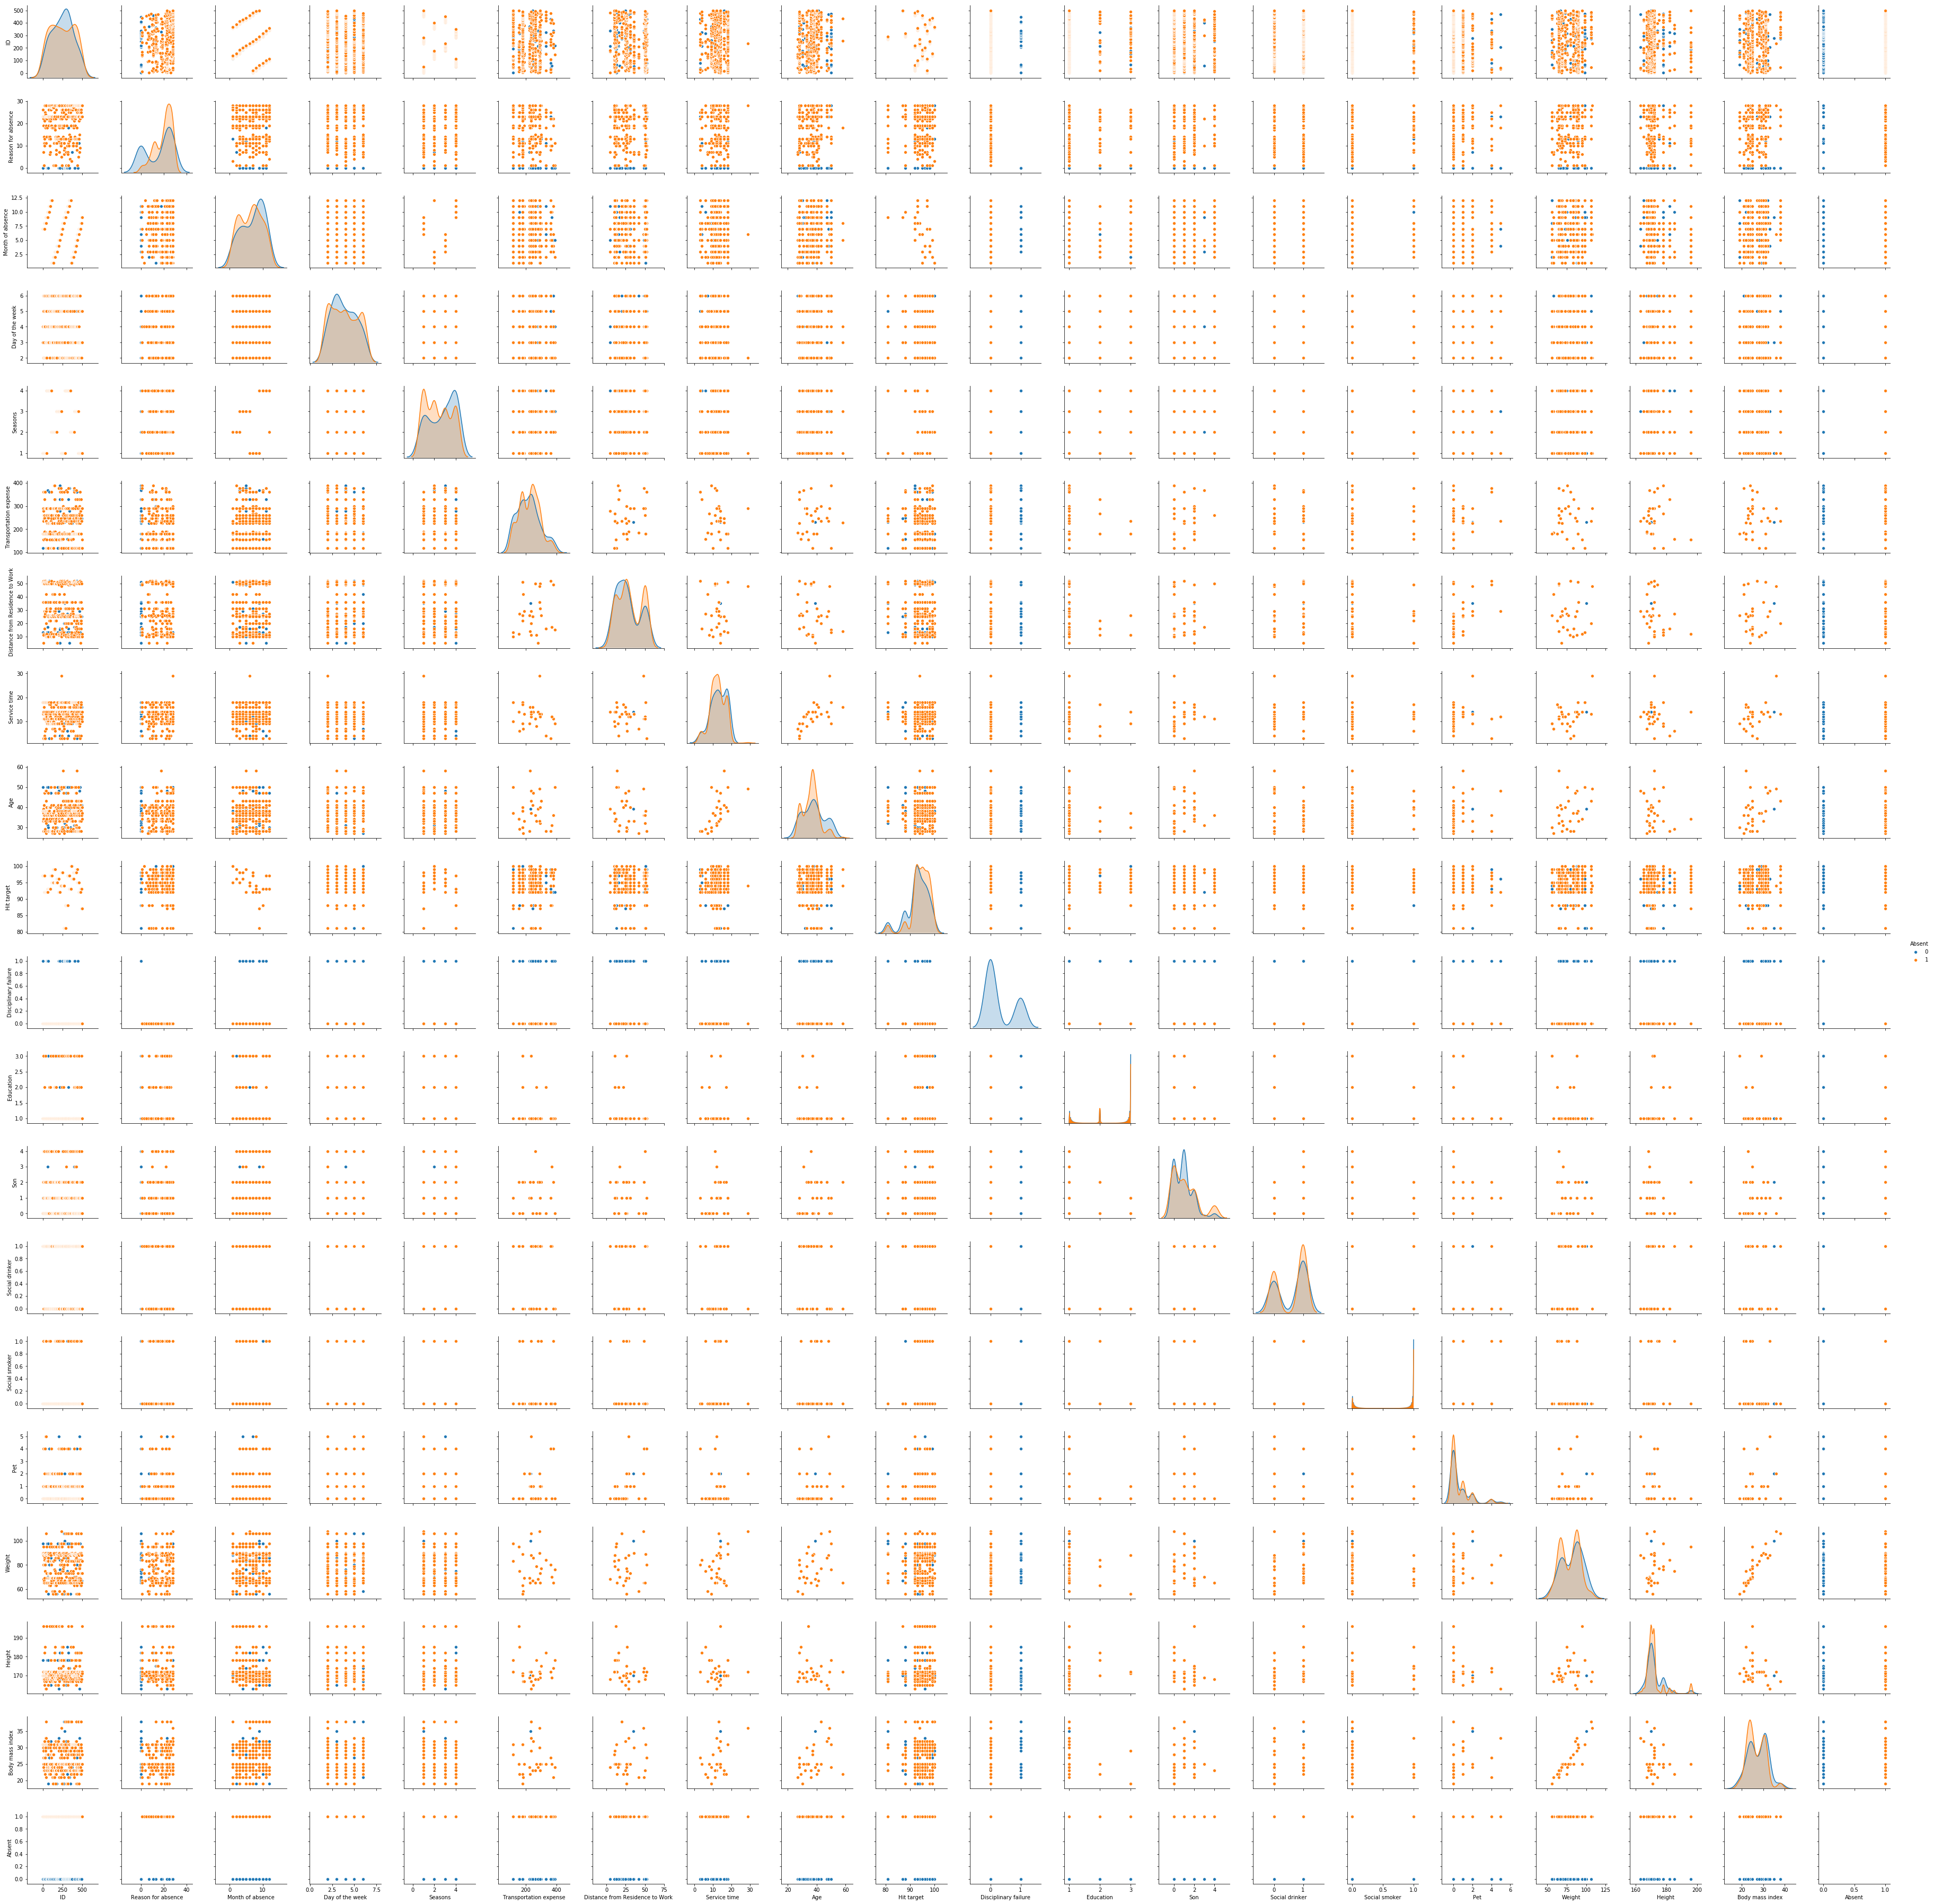

In [28]:
sns.pairplot(train,hue="Absent")

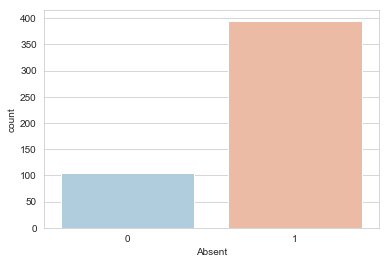

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',data=train,palette='RdBu_r')

O countplot anterior contou o número de veres que os funcionários se ausentaram na empresa, como é possível observar, o número de ausências é bastante superior ao número de vezes que não se ausentaram. 

Continuando ainda com os countplots...

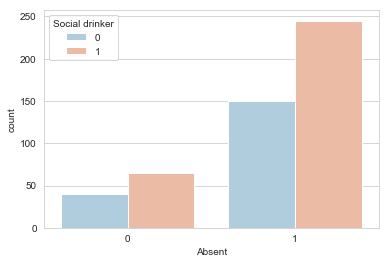

In [63]:
sns.set_style('whitegrid') 
sns.countplot(x='Absent',hue='Social drinker',data=train,palette='RdBu_r')

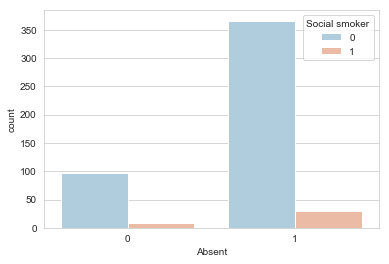

In [64]:
sns.set_style('whitegrid') 
sns.countplot(x='Absent',hue='Social smoker',data=train,palette='RdBu_r')

Como podemos ver pelos dois countplots anteriores, existe uma maior correlação de ausência se um funcionário for Social Drinker ao invés de ser Social Smoker.

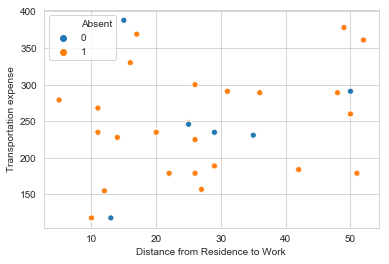

In [65]:
sns.scatterplot(x="Distance from Residence to Work",y="Transportation expense",hue="Absent",data=train)

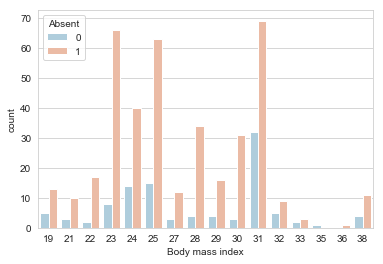

In [71]:
sns.set_style('whitegrid') 
sns.countplot(x='Body mass index',hue='Absent',data=train,palette='RdBu_r')

Portanto, e tal como seria expectável, aumentando o índice de massa corporal, maior será também o risco de ter que se ausentar do trabalho, uma vez que está mais sujeito a ter complicações com a sáude.

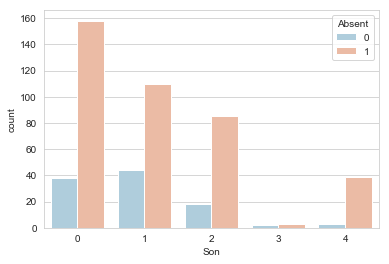

In [75]:
sns.set_style('whitegrid') 
sns.countplot(x='Son',hue='Absent',data=train,palette='RdBu_r')

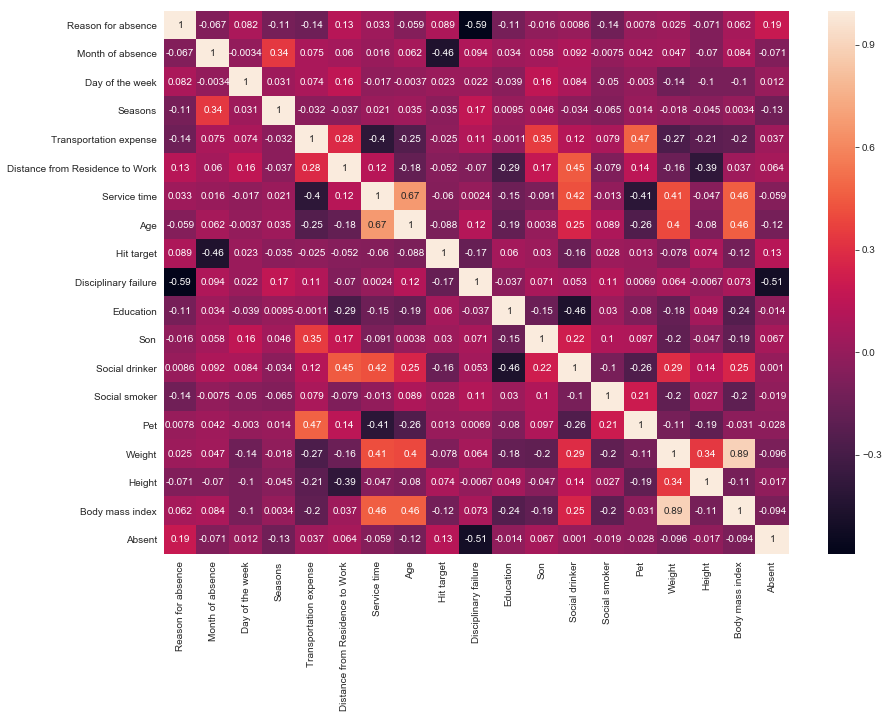

In [76]:
plt.figure(figsize = (14, 10))
heat = sns.heatmap(train.drop(['ID'],axis=1).corr(), annot = True)

Portanto, na figura anterior apresenta-se um heatmap de correlação entre as diversas features, sendo, por exemplo possível observar que o peso é altamente correlado com o body mass index.